In [48]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Será realizado análises de séries temporais e previsões de vendas de móveis.

In [49]:
df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

Dados de vendas de móveis por 4 anos.

In [50]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [51]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

## Pré-Processamento de Dados

Esta etapa inclui a remoção de colunas desnecessárias, verificação de valores ausentes, agregação de vendas por data e assim por diante.

In [52]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [53]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [54]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [55]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


## Indexação com Dados de Série Temporal

In [56]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Os dados atuais de data e hora podem ser complicados de trabalhar, portanto, são usados o valor médio diário das vendas daquele mês e o início de cada mês como carimbo de data/hora

In [57]:
y = furniture['Sales'].resample('MS').mean()

In [58]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

## Visualização de Dados de Série Temporal de Vendas de Móveis

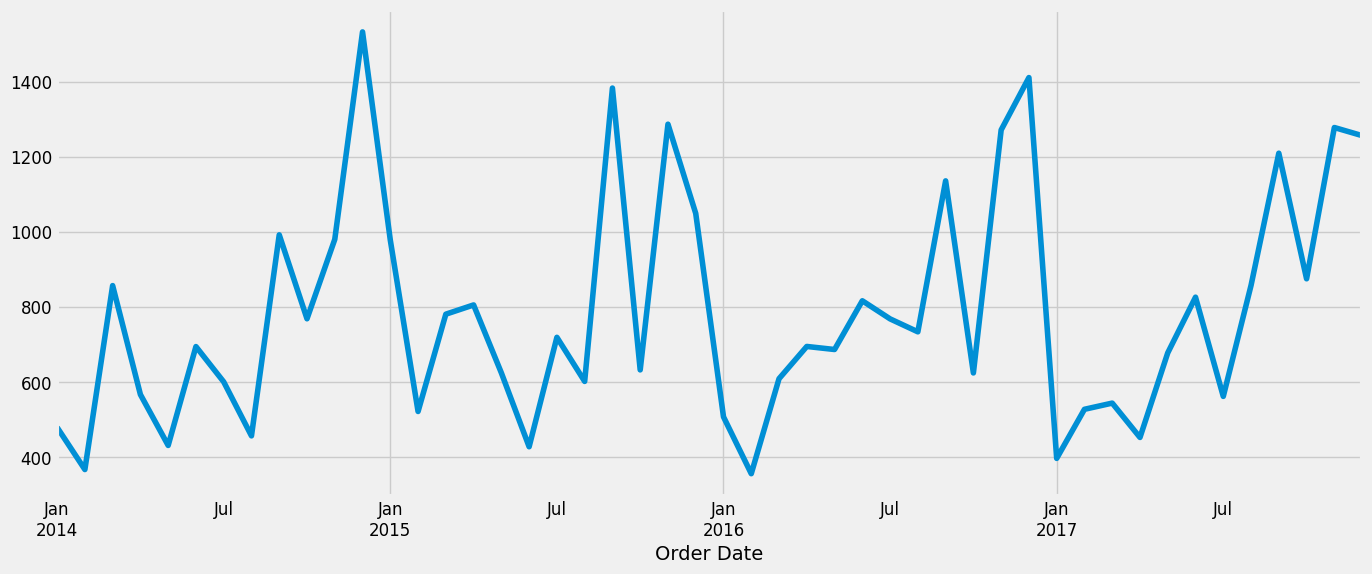

In [59]:
y.plot(figsize=(15, 6))
plt.show()

Alguns padrões distinguíveis aparecem quando os dados são plotados. 
A série temporal possui padrão de sazonalidade, pois as vendas são sempre baixas no início do ano e altas no final do ano. 
Há sempre uma forte tendência ascendente em qualquer ano, com alguns meses baixos no meio do ano.

Também é possível visualizar os dados usando um método chamado decomposição de série temporal, que permite decompor a série temporal em três componentes distintos: tendência, sazonalidade e ruído.

Os gráficos abaixo mostram claramente que as vendas de móveis são instáveis, juntamente com sua sazonalidade.

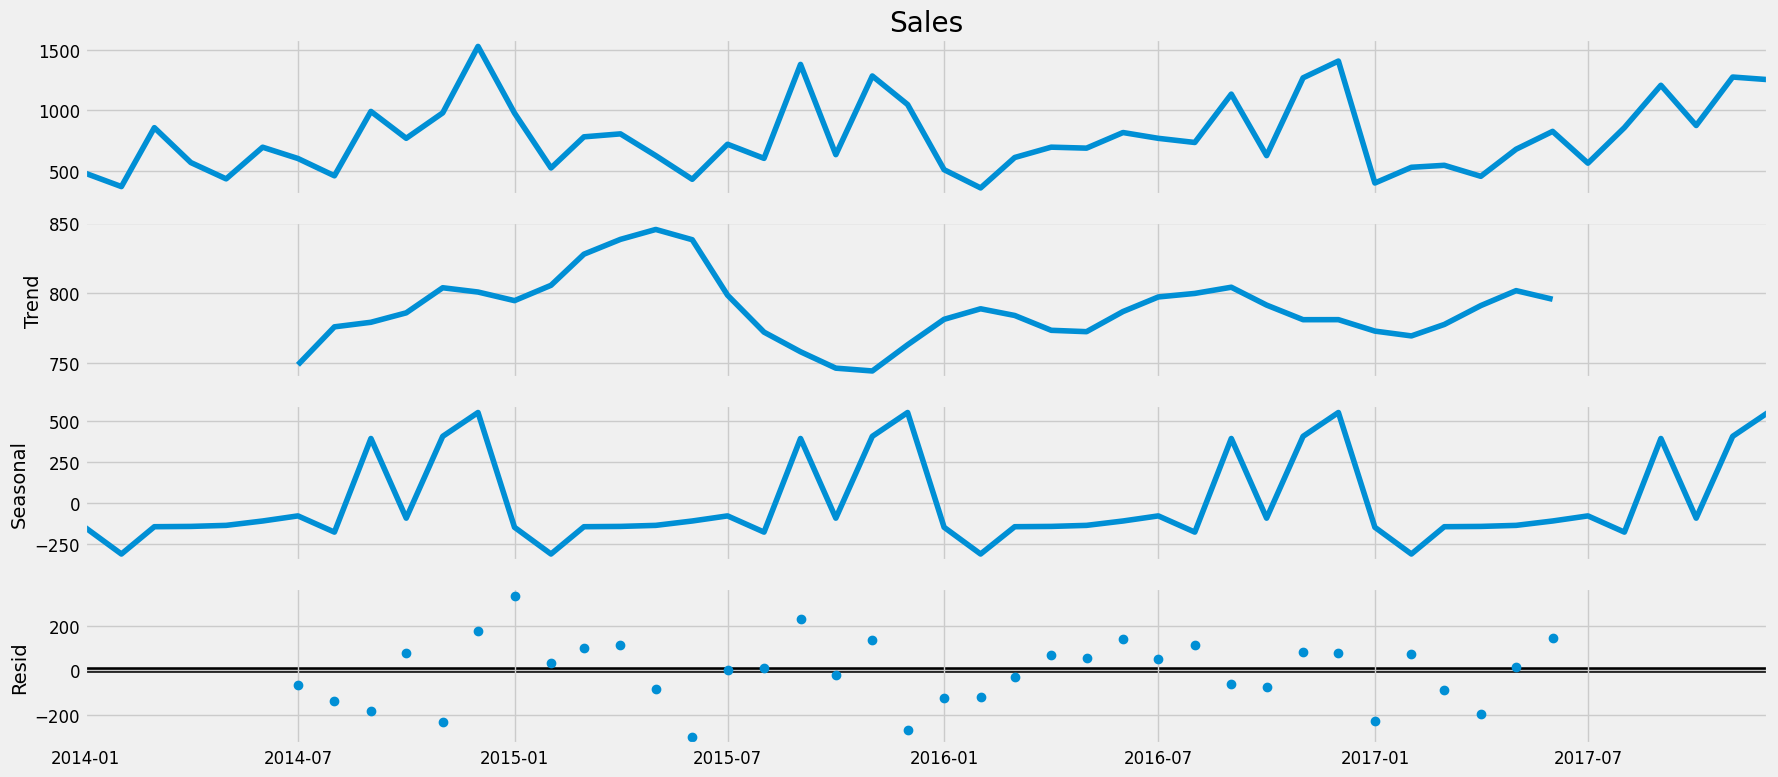

In [60]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()